In [476]:
__version__ = '0.3'
__author__  = "Robert Matern (r.matern@stud.uni-hannover.de)"
__date__    = ''
__url__     = ''
__copyright__ = "(C) 2015 Robert Matern"

#Beispieldaten Nr. 1

In [477]:
%run Parameter.ipynb
%run DynamicProgramm.ipynb

In [478]:
# Produkte
products = Product(2)

# Ressourcen
resources = Resource(2)

#Kapazität
capacities = Capacity(resources)
capacities[1] = 2
capacities[2] = 1

# Ressourcenverbrauch
consumtions = Consumption(products, resources)
consumtions[1] = [0,1,0]
consumtions[2] = [0,0,1]

# Erträge
revenues = Revenue(products)
revenues[1] = 100
revenues[2] = 200

# Buchungshorizont
times = Time(4)

# Wahrscheinlichkeiten
probs = Prob(products, times)
probs[1] = [0, 0.5, 0.5, 0.5, 0.5]
probs[2] = [0, 0.1, 0.1, 0.1, 0.1]

# Gegenwahrscheinlichkeiten
against_probs = Against_Prob(probs)
probs[0] = against_probs

# Systemzustände
conditions = Condition(capacities, resources, times)

# Endzeitpunkte
#end_times = End_Time(conditions)

0:00:00.000313


In [479]:
import datetime
a = datetime.datetime.now()
print DP(solutions, conditions, products, resources, capacities, consumtions, times)
print datetime.datetime.now()-a

231.25
0:00:00.031251


In [480]:
# Erstellung der Struktur als NetworkX-Graph
graph = Structure(solutions, products, consumtions, revenues, probs)

#print nx.is_directed_acyclic_graph(graph)

# Ermittlung der besten Politik (Dijkstra Algorithmus)
best_politic = Best_Politic(graph, times, products)

#Best_Path(graph, times)

Bei der Bestimmung der optimalen Politik zum Zeitpunkt t wird davon ausgegangen, dass alle Anfragetypen eintreffen. 

Zum Zeitpunkt 4 mit einer Kapazität von [2 1] ist die optimale Politik:
Annahme des Auftrags 2
Der Ertrag r[j] abzgl. Opportunitätskosten OC[j,c,t] beträgt: 145.81 

Zum Zeitpunkt 3 mit einer Kapazität von [2 0] ist die optimale Politik:
Annahme des Auftrags 1
Der Ertrag r[j] abzgl. Opportunitätskosten OC[j,c,t] beträgt: 75.0 

Zum Zeitpunkt 3 mit einer Kapazität von [1 1] ist die optimale Politik:
Annahme des Auftrags 2
Der Ertrag r[j] abzgl. Opportunitätskosten OC[j,c,t] beträgt: 162.0 

Zum Zeitpunkt 2 mit einer Kapazität von [1 0] ist die optimale Politik:
Annahme des Auftrags 1
Der Ertrag r[j] abzgl. Opportunitätskosten OC[j,c,t] beträgt: 50.0 

Zum Zeitpunkt 2 mit einer Kapazität von [0 1] ist die optimale Politik:
Annahme des Auftrags 2
Der Ertrag r[j] abzgl. Opportunitätskosten OC[j,c,t] beträgt: 180.0 

Zum Zeitpunkt 1 mit einer Kapazität von [0 0] ist die opti

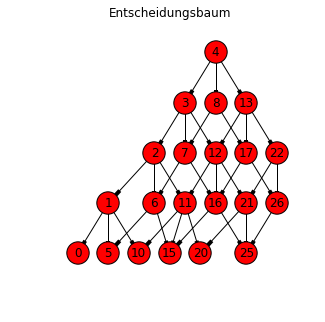

In [481]:
Drawing(graph)